In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size = 100) #-3到3之间随机取100个值
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 +np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

#### 学习曲线

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
X_train.shape

(75, 1)

In [3]:
#先用线性模型来训练，从1-75
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #使用均方误差 
train_score = [] #存储训练误差
test_score = [] #存储测试误差
for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

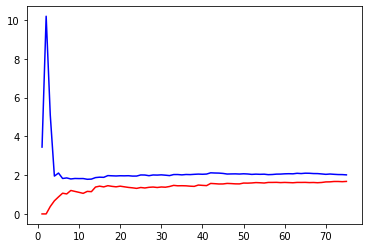

In [4]:
#误差的变化
plt.plot([ i for i in range(1, 76)], np.sqrt(train_score), label="train", color='r' )
plt.plot([ i for i in range(1, 76)], np.sqrt(test_score), label="test", color = 'b')
plt.show() #由于是使用train数据集训练的数据，故train数据集拟合的曲线的误差低一些，test数据集的误差高一些。

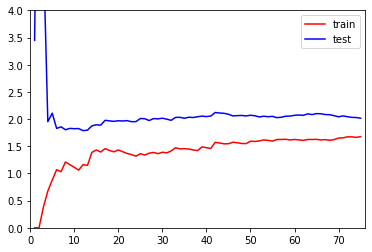

In [5]:
#封装成函数
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = [] #存储训练误差
    test_score = [] #存储测试误差
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    plt.plot([ i for i in range(1, len(X_train)+1)], np.sqrt(train_score), label="train", color='r' )
    plt.plot([ i for i in range(1, len(X_train)+1)], np.sqrt(test_score), label="test", color = 'b')
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show() #由于是使用train数据集训练的数据，故train数据集拟合的曲线的误差低一些，test数据集的误差高一些。
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test) #由于y轴取值问题，故和上面的图不同

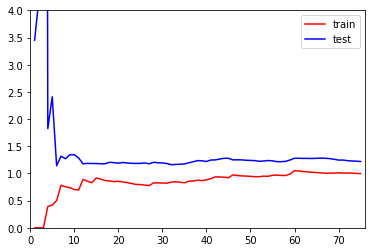

In [6]:
#用多项式模型来训练
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degress):
    return Pipeline([
        ("PolynomialFeatures", PolynomialFeatures(degree= degress)),
        ("StandardScaler", StandardScaler()),
        ("LinearRegression", LinearRegression())
    ])
plot2_reg = PolynomialRegression(degress=2)
plot_learning_curve(plot2_reg, X_train, X_test, y_train, y_test)

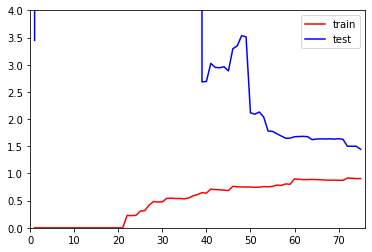

In [7]:
plot20_reg = PolynomialRegression(degress=20)
plot_learning_curve(plot20_reg, X_train, X_test, y_train, y_test)

由于是使用train数据集训练的数据，故train数据集拟合的曲线的误差低一些，test数据集的误差高一些。